In [170]:
import logging, sys
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Load data from Database

In [171]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    tweets = pd.read_sql_query(f"SELECT * FROM tweets", connection)
    songs = pd.read_sql_query(f"SELECT * FROM songs", connection)
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

Tweeter data destribution

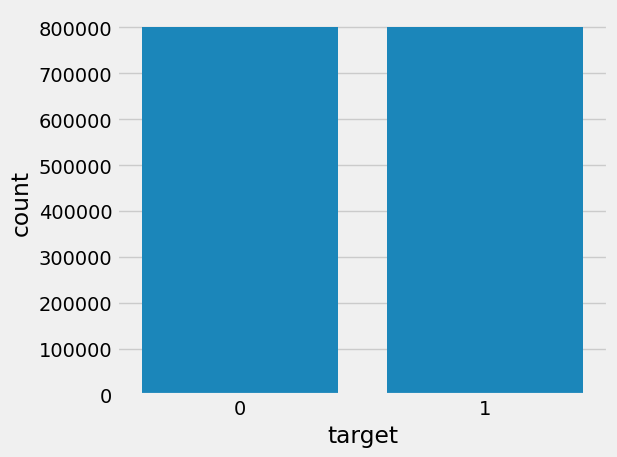

In [266]:
plt.style.use("fivethirtyeight")
sns.countplot(x="target", data=tweets)
plt.tight_layout()
plt.show()

Spotify Song feature destribution

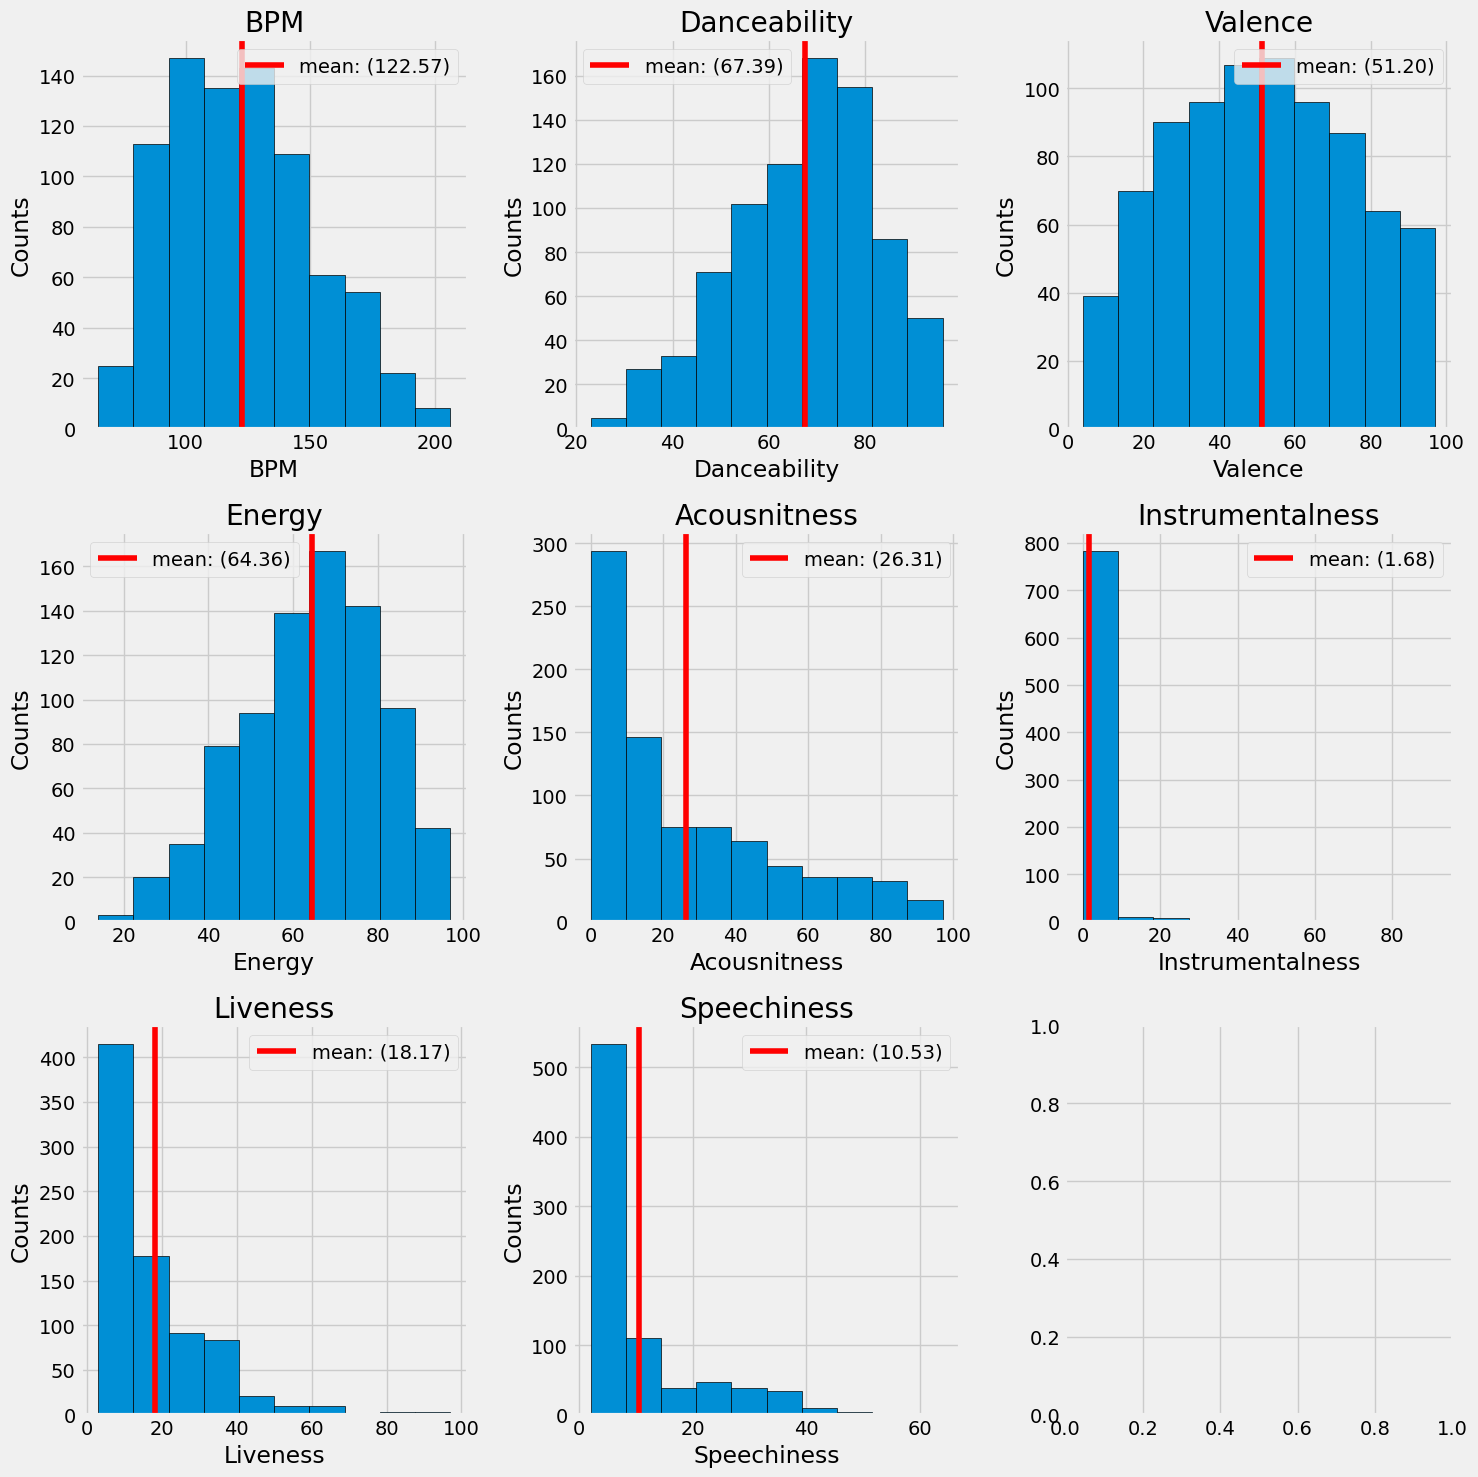

In [264]:
plt.style.use("fivethirtyeight")

fig, axs = plt.subplots(3,3, figsize=(15, 15))

bpm = songs["bpm"]
bpm_mean = bpm.mean()
axs[0,0].hist(bpm, histtype='bar', edgecolor="black")
axs[0,0].set_title("BPM")
axs[0,0].set_xlabel("BPM")
axs[0,0].set_ylabel("Counts")
axs[0,0].axvline(bpm_mean, color="red", label=f"mean: ({bpm_mean:.2f})")
axs[0,0].legend()

danceability = songs["danceability_%"]
danceability_mean = danceability.mean()
axs[0,1].hist(danceability, histtype='bar', edgecolor="black")
axs[0,1].set_title("Danceability")
axs[0,1].set_xlabel("Danceability")
axs[0,1].set_ylabel("Counts")
axs[0,1].axvline(danceability_mean, color="red", label=f"mean: ({danceability_mean:.2f})")
axs[0,1].legend()

valence = songs["valence_%"]
valence_mean = valence.mean()
axs[0,2].hist(valence, histtype='bar', edgecolor="black")
axs[0,2].set_title("Valence")
axs[0,2].set_xlabel("Valence")
axs[0,2].set_ylabel("Counts")
axs[0,2].axvline(valence_mean, color="red", label=f"mean: ({valence_mean:.2f})")
axs[0,2].legend()


energy = songs["energy_%"]
energy_mean = energy.mean()
axs[1,0].hist(energy, histtype='bar', edgecolor="black")
axs[1,0].set_title("Energy")
axs[1,0].set_xlabel("Energy")
axs[1,0].set_ylabel("Counts")
axs[1,0].axvline(energy_mean, color="red", label=f"mean: ({energy_mean:.2f})")
axs[1,0].legend()


acousnitness = songs["acousticness_%"]
acousnitness_mean = acousnitness.mean()
axs[1,1].hist(acousnitness, histtype='bar', edgecolor="black")
axs[1,1].set_title("Acousnitness")
axs[1,1].set_xlabel("Acousnitness")
axs[1,1].set_ylabel("Counts")
axs[1,1].axvline(acousnitness_mean, color="red", label=f"mean: ({acousnitness_mean:.2f})")
axs[1,1].legend()


instrumentalness = songs["instrumentalness_%"]
instrumentalness_mean = instrumentalness.mean()
axs[1,2].hist(instrumentalness, histtype='bar', edgecolor="black")
axs[1,2].set_title("Instrumentalness")
axs[1,2].set_xlabel("Instrumentalness")
axs[1,2].set_ylabel("Counts")
axs[1,2].axvline(instrumentalness_mean, color="red", label=f"mean: ({instrumentalness_mean:.2f})")
axs[1,2].legend()


liveness = songs["liveness_%"]
liveness_mean = liveness.mean()
axs[2,0].hist(liveness, histtype='bar', edgecolor="black")
axs[2,0].set_title("Liveness")
axs[2,0].set_xlabel("Liveness")
axs[2,0].set_ylabel("Counts")
axs[2,0].axvline(liveness_mean, color="red", label=f"mean: ({liveness_mean:.2f})")
axs[2,0].legend()


speechiness = songs["speechiness_%"]
speechiness_mean = speechiness.mean()
axs[2,1].hist(speechiness, histtype='bar', edgecolor="black")
axs[2,1].set_title("Speechiness")
axs[2,1].set_xlabel("Speechiness")
axs[2,1].set_ylabel("Counts")
axs[2,1].axvline(speechiness_mean, color="red", label=f"mean: ({speechiness_mean:.2f})")
axs[2,1].legend()

plt.tight_layout()
plt.show()

Create user playlist from the songs data

In [175]:
_, user_playlist, _, _ = train_test_split(songs, songs["valence_%"].values, test_size=0.10, random_state=42)

In [176]:
try:
    connection = sqlite3.connect("../data/project.sqlite")
    user_playlist.to_sql("user_playlist", con=connection, if_exists="replace")
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connection.close()

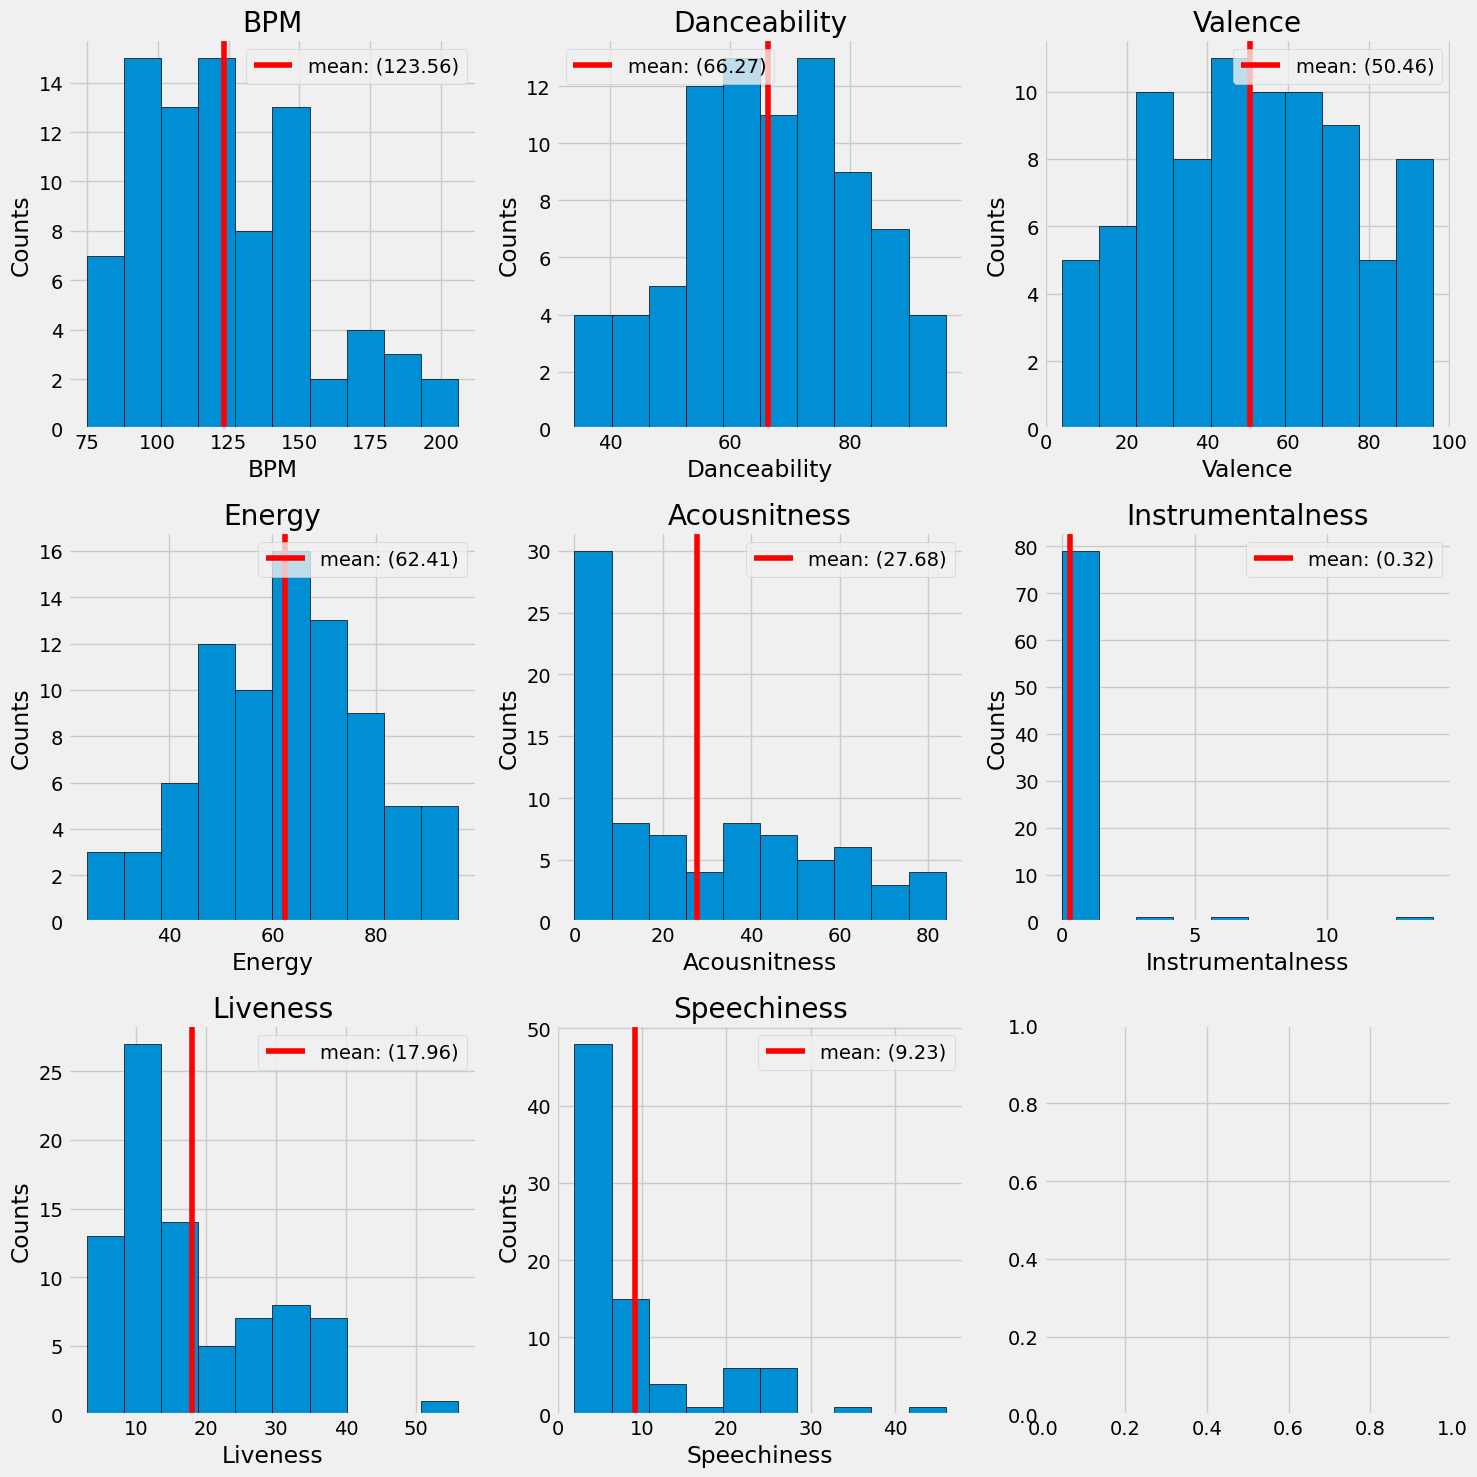

In [259]:
plt.style.use("fivethirtyeight")

fig, axs = plt.subplots(3,3, figsize=(15, 15))

bpm = user_playlist["bpm"]
bpm_mean = bpm.mean()
axs[0,0].hist(bpm, histtype='bar', edgecolor="black")
axs[0,0].set_title("BPM")
axs[0,0].set_xlabel("BPM")
axs[0,0].set_ylabel("Counts")
axs[0,0].axvline(bpm_mean, color="red", label=f"mean: ({bpm_mean:.2f})")
axs[0,0].legend()

danceability = user_playlist["danceability_%"]
danceability_mean = danceability.mean()
axs[0,1].hist(danceability, histtype='bar', edgecolor="black")
axs[0,1].set_title("Danceability")
axs[0,1].set_xlabel("Danceability")
axs[0,1].set_ylabel("Counts")
axs[0,1].axvline(danceability_mean, color="red", label=f"mean: ({danceability_mean:.2f})")
axs[0,1].legend()

valence = user_playlist["valence_%"]
valence_mean = valence.mean()
axs[0,2].hist(valence, histtype='bar', edgecolor="black")
axs[0,2].set_title("Valence")
axs[0,2].set_xlabel("Valence")
axs[0,2].set_ylabel("Counts")
axs[0,2].axvline(valence_mean, color="red", label=f"mean: ({valence_mean:.2f})")
axs[0,2].legend()


energy = user_playlist["energy_%"]
energy_mean = energy.mean()
axs[1,0].hist(energy, histtype='bar', edgecolor="black")
axs[1,0].set_title("Energy")
axs[1,0].set_xlabel("Energy")
axs[1,0].set_ylabel("Counts")
axs[1,0].axvline(energy_mean, color="red", label=f"mean: ({energy_mean:.2f})")
axs[1,0].legend()


acousnitness = user_playlist["acousticness_%"]
acousnitness_mean = acousnitness.mean()
axs[1,1].hist(acousnitness, histtype='bar', edgecolor="black")
axs[1,1].set_title("Acousnitness")
axs[1,1].set_xlabel("Acousnitness")
axs[1,1].set_ylabel("Counts")
axs[1,1].axvline(acousnitness_mean, color="red", label=f"mean: ({acousnitness_mean:.2f})")
axs[1,1].legend()


instrumentalness = user_playlist["instrumentalness_%"]
instrumentalness_mean = instrumentalness.mean()
axs[1,2].hist(instrumentalness, histtype='bar', edgecolor="black")
axs[1,2].set_title("Instrumentalness")
axs[1,2].set_xlabel("Instrumentalness")
axs[1,2].set_ylabel("Counts")
axs[1,2].axvline(instrumentalness_mean, color="red", label=f"mean: ({instrumentalness_mean:.2f})")
axs[1,2].legend()


liveness = user_playlist["liveness_%"]
liveness_mean = liveness.mean()
axs[2,0].hist(liveness, histtype='bar', edgecolor="black")
axs[2,0].set_title("Liveness")
axs[2,0].set_xlabel("Liveness")
axs[2,0].set_ylabel("Counts")
axs[2,0].axvline(liveness_mean, color="red", label=f"mean: ({liveness_mean:.2f})")
axs[2,0].legend()


speechiness = user_playlist["speechiness_%"]
speechiness_mean = speechiness.mean()
axs[2,1].hist(speechiness, histtype='bar', edgecolor="black")
axs[2,1].set_title("Speechiness")
axs[2,1].set_xlabel("Speechiness")
axs[2,1].set_ylabel("Counts")
axs[2,1].axvline(speechiness_mean, color="red", label=f"mean: ({speechiness_mean:.2f})")
axs[2,1].legend()

plt.tight_layout()
plt.show()
# plt.hist(user_playlist["danceability_%"], histtype='bar', label="valence")
# plt.hist(user_playlist["valence_%"], histtype='bar', label="valence")
# plt.hist(user_playlist["energy_%"], histtype='bar', label="valence")

In [127]:
positive_tweet = tweets[tweets.target == 1]["processed_text"]
negative_tweet = tweets[tweets.target == 0]["processed_text"]
tweets[tweets.target == 0]["text"].iloc[2]

'my whole body feels itchy and like its on fire '

(-0.5, 399.5, 199.5, -0.5)

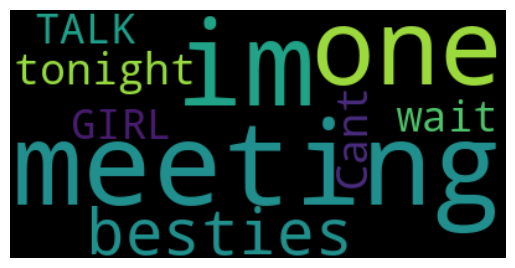

In [121]:
wordcloud = WordCloud().generate(positive_tweet.iloc[1])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Data Preprocessing

In [99]:
tweets.iloc[0]["processed_text"]

'upset update facebook texting might cry result school today also blah'

In [100]:
X = tweets["processed_text"].values
Y = tweets["target"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Convert text data into numerical data

In [101]:
vectorizer = TfidfVectorizer()
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999,) (320000,)


In [102]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Logistic Regresion exploration

In [109]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'max_iter' : [1000, 2500, 5000]
    }
]

In [110]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,Y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/pranto/Documents/Codes/project-made/made-template/venv/lib/python3.11/site-packages/scipy

KeyboardInterrupt: 

In [ ]:
model = LogisticRegression(max_iter=1000)
print(X.shape, X_train.shape, X_test.shape)

(1599999,) (1279999, 222224) (320000, 222224)


In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Training accuracy:", training_accuracy)

Training accuracy: 0.7984373425291739


In [ ]:
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.77835625


In [ ]:
data_point = ["Bangladesh lost the world cup"]
data_point_vectorized = vectorizer.transform(data_point)
prediction = model.predict(data_point_vectorized)
print("Prediction: ", prediction, "Data: ", data_point)

Prediction:  [0] Data:  ['Bangladesh lost the world cup']
